# MNIST Basic Approach (Softmax)

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

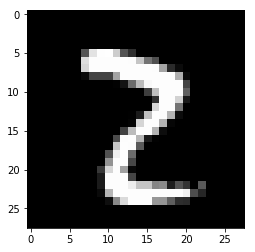

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.imshow(mnist.train.images[33409].reshape(28,28))

# FLOW

Create Placeholders, Variables -> Create Graph Operations -> Create your Loss Function -> Choose your optimizer -> Create a Session


In [45]:
# Placeholders 
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [46]:
# Variables
W = tf.Variable(initial_value=tf.zeros([784,10]))
b = tf.Variable(initial_value=tf.zeros([10]))

In [47]:
# Create Graph Operations
y = tf.add(tf.matmul(x,W),b)

In [48]:
# Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [49]:
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [50]:
# Create Session
init = tf.global_variables_initializer()

In [76]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x,batch_y = mnist.train.next_batch(batch_size=100)
        
        sess.run(train,feed_dict={
            x : batch_x,
            y_true : batch_y
        })
        
    # Evaluate the model
    correct_prediction = tf.equal(tf.argmax(y,axis=1),tf.argmax(y_true,axis=1))
    
    acc = tf.reduce_mean(tf.cast(correct_prediction,dtype=tf.float32))
    
    print(sess.run(acc,feed_dict={
        x : mnist.test.images,
        y_true : mnist.test.labels
    }))

0.9169
